## 6.6 Sourcing & Analyzing Time Series Data



### 1. Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

# Disable deprecation warnings
warnings.filterwarnings('ignore') 

# Styling option for how plots will appear
plt.style.use('fivethirtyeight') 

### 2. Importing data

#### Note:

Since no suitable data could be found on Quandle that was related to the broader research topic of my Achievement project (the *World Risk Index*), I instead sourced temperature anomaly data from the National Centers for Environmental Information (NCEI). The sourced dataset contains a *global time series of combined land and ocean temperature anomalies  with monthly observations from January 2001 to February 2024*. Temperature anomaly records are expressed in ℃.

The global component of Climate at a Glance (GCAG) provides global-scale temperature information using data from NOAA's Global Surface Temperature Analysis (NOAAGlobalTemp), which uses comprehensive data collections with enhanced global coverage over land (Global Historical Climatology Network-Monthly) and ocean (Extended Reconstructed Sea Surface Temperature) surfaces. The tool provides near real-time analysis of monthly and annual temperatures for the globe and is intended for the study of climate variability and change. Data are provided globally, by hemisphere, and by land and ocean surface components.

**Subsetting:** The source data are available since 1850. However, since climate conditions have changed significantly in the current millennium and my main dataset for this achievement only contains data from 2011 onwards, I decided to source data from January 2001 to February 2024. Not only does this provide sufficient data for a time series analysis, but it may also reveal periodic trends or patterns prior to 2011 that had a later impact on the WorldRiskIndex.

**Source:** NOAA National Centers for Environmental Information, Climate at a Glance: Global Time Series, published March 2024, retrieved from https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series.

In [6]:
# Turn project folder path into a string
path = r'C:/Users/Marker/Desktop/World Risk Index 03-25'

In [7]:
path

'C:/Users/Marker/Desktop/World Risk Index 03-25'

In [8]:
# Import "temp_anomalies_prepared.csv"
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'temp_anomalies_prepared.csv'), index_col = False)

In [9]:
# Confirm the shape of the dataset
df.shape

(278, 2)

### 3. Preparing data

In [11]:
# Check the columns of the DataFrame
df.columns

Index(['Date', 'Anomaly'], dtype='object')

#### 3.1 Cleaning

In [13]:
# Check for missing values
df.isnull().sum()

Date       0
Anomaly    0
dtype: int64

#### Note:

No missing values found.

In [15]:
# Find duplicates
df_dups = df[df.duplicated()]

df_dups

,Date,Anomaly


#### Note:

No duplicates found.

#### 3.2 Wrangling

In [18]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
# Check metadata of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     278 non-null    datetime64[ns]
 1   Anomaly  278 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.5 KB


In [20]:
# Set 'Date' as the DataFrame's index
df.set_index('Date', inplace=True)

In [21]:
# Check a sample
df.head()

,Anomaly
Date,
2001-01-01,0.45
2001-02-01,0.43
2001-03-01,0.55
2001-04-01,0.53
2001-05-01,0.57


#### 4. Smoothing/ Create a line chart

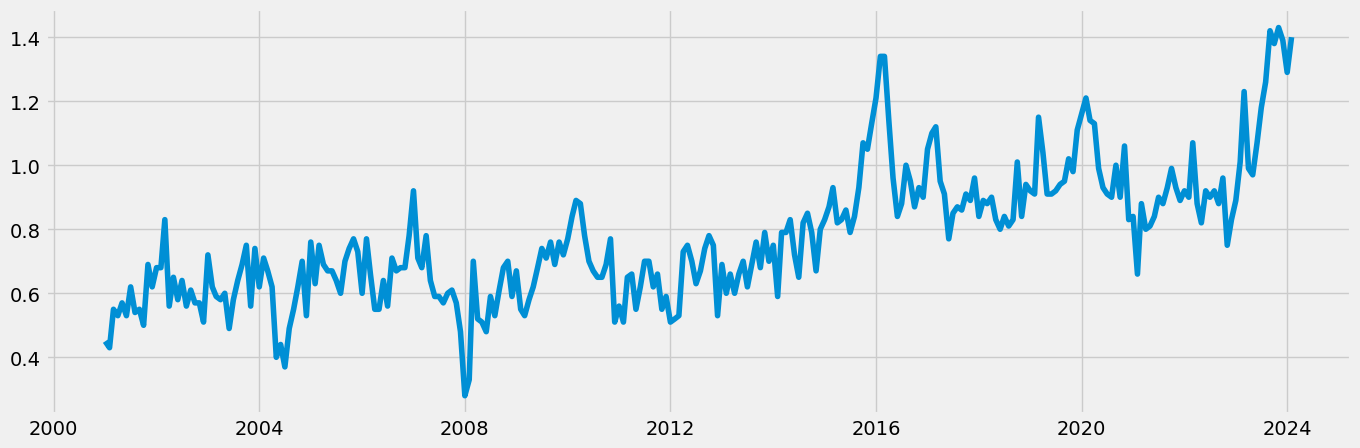

In [23]:
# Set size & quality
plt.figure(figsize=(15,5), dpi=100)

# Plot the DataFrame
plt.plot(df)

In [24]:
# Define the window size for the moving average
window_size = 48

In [25]:
# Calculate the 6-month moving average
moving_average = df['Anomaly'].rolling(window=window_size, min_periods=1).mean()

In [26]:
# Create a new DataFrame for the moving average
df_smoothed = pd.DataFrame({'Anomaly Moving Average': moving_average}, index=df.index)

In [27]:
# Confirm the shape of the dataset
df_smoothed.shape

(278, 1)

In [28]:
# Check a sample
df_smoothed.head()

,Anomaly Moving Average
Date,
2001-01-01,0.450000
2001-02-01,0.440000
2001-03-01,0.476667
2001-04-01,0.490000
2001-05-01,0.506000


In [29]:
# Check for missing values
df_smoothed.isnull().sum()

Anomaly Moving Average    0
dtype: int64

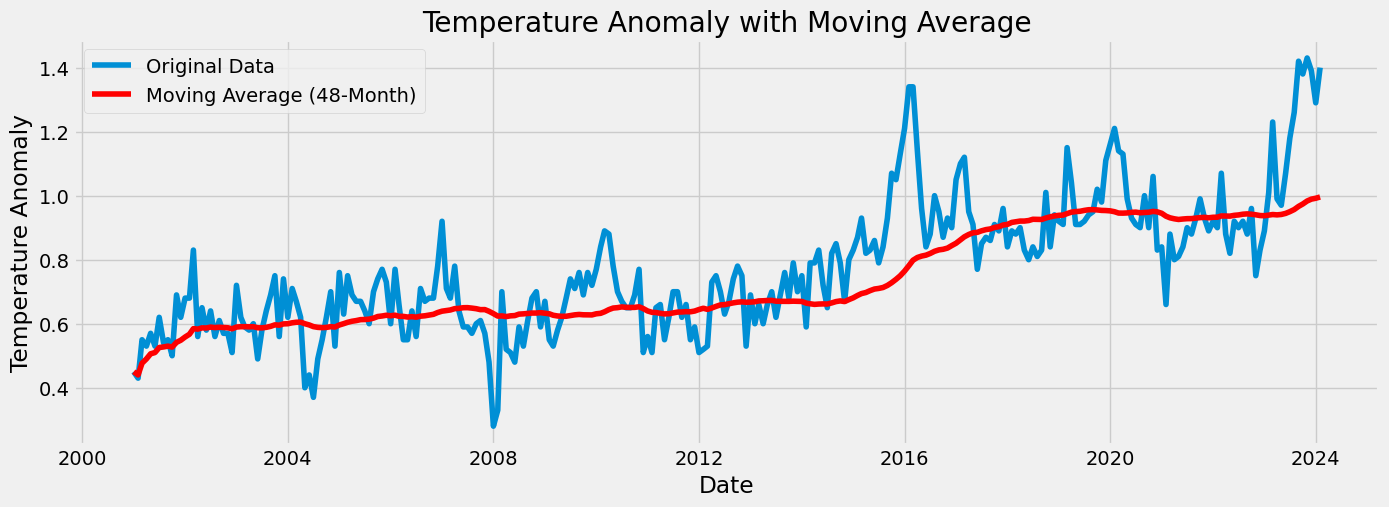

In [30]:
# Plot the original data and the moving average
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df.index, df['Anomaly'], label='Original Data')
plt.plot(df.index, moving_average, color='red', label='Moving Average ({}-Month)'.format(window_size))
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature Anomaly with Moving Average')
plt.legend()
plt.show()

### 5. Time series analysis: decomposition

In [76]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_smoothed, model='additive')

In [33]:
# Import rcParams function
from pylab import rcParams

# Define a fixed size for all special charts
rcParams['figure.figsize'] = 18, 7 

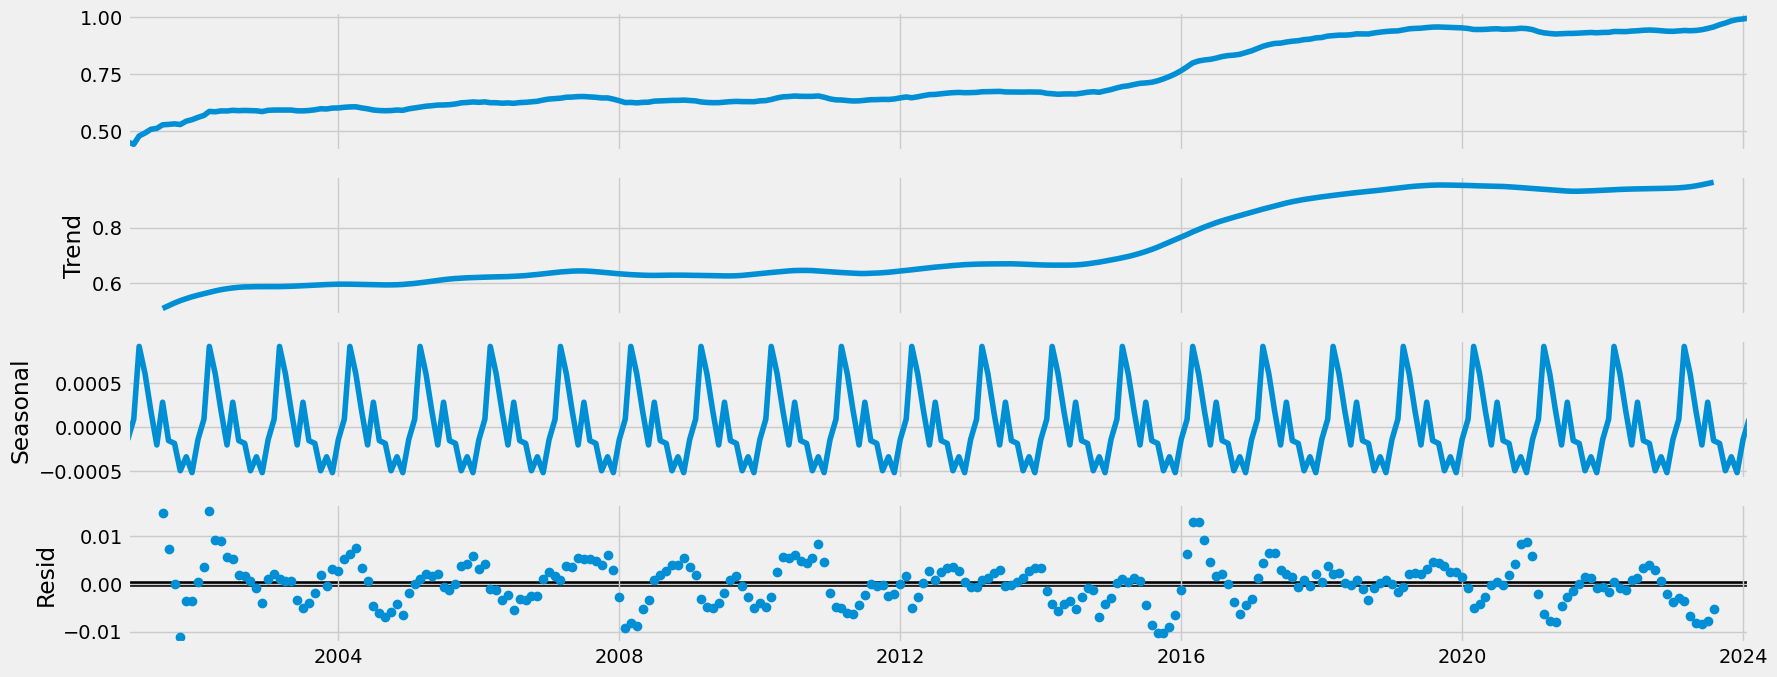

In [34]:
# Plot the separate components
decomposition.plot()
plt.show()

#### Interpretation:

* The *trend* component reflects the underlying long-term movement in the data. Due to the prior smoothing of the data, it appears similar to the *level*. The trend shows that temperature anomalies have been increasing steadily since 2001, with a noticeable increase around 2015. Possible explanations for this include:
    * Events such as the prolonged heat waves or record-high temperatures experienced in various regions of the world in the mid-2010s may have contributed to the overall increase in temperature anomalies during this period. 
    * Strong El Niño events, such as those observed in 2015-2016, can lead to higher global temperatures and altered precipitation patterns, potentially contributing to the observed increase in temperature anomalies during this period.
* The *seasonal* graph shows a cyclical pattern of temperature anomalies throughout the year, with distinct peaks and troughs corresponding to seasonal changes in temperature.
    * The most significant peak occurs at the beginning of the year, indicating that there is a consistent pattern of temperature anomalies peaking in the early months, probably January or February. This peak is positive, indicating that temperatures during this period tend to be higher than the seasonal average.
    * Although not as pronounced as the beginning of the year peak, there is a smaller peak in the middle of the year. This secondary peak probably corresponds to the summer temperature peak, indicating a period of consistently warmer weather during this time.
    * Towards the end of the year, there is a negative peak where the anomalies reach their lowest point. This indicates that the late fall or early winter months are cooler than the seasonal average.
* Despite the smoothing of the data, the *residual* graph still shows some noise. However, the noise range of -0.01 to 0.01 suggests that the residuals, or unexplained variability, are relatively small. In addition, temperature anomalies can also exhibit shorter-term fluctuations due to natural variability in the climate system, such as El Niño events or volcanic eruptions, meaning that some noise may be inherent in capturing these variations.

### 6. Dickey-Fuller test

In [37]:
# Import adfuller() function
from statsmodels.tsa.stattools import adfuller

# Define the function
def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the function on the time series
dickey_fuller(df_smoothed)

Dickey-Fuller Stationarity test:
Test Statistic                   0.210109
p-value                          0.972823
Number of Lags Used              5.000000
Number of Observations Used    272.000000
Critical Value (1%)             -3.454622
Critical Value (5%)             -2.872225
Critical Value (10%)            -2.572464
dtype: float64


#### Interpretation:

*Null hypothesis: There is a unit root in the data.*

*Alternative hypothesis: There is no unit root in the data.*

* The test statistic is greater than all critical values, so the *null hypothesis can't be rejected*. 
* Further, the p-value of 0.972823 is higher than the significance level (0.05), indicating weak evidence against the null hypothesis. 
* The test results suggest that the data is likely non-stationary and needs to be stationarized.

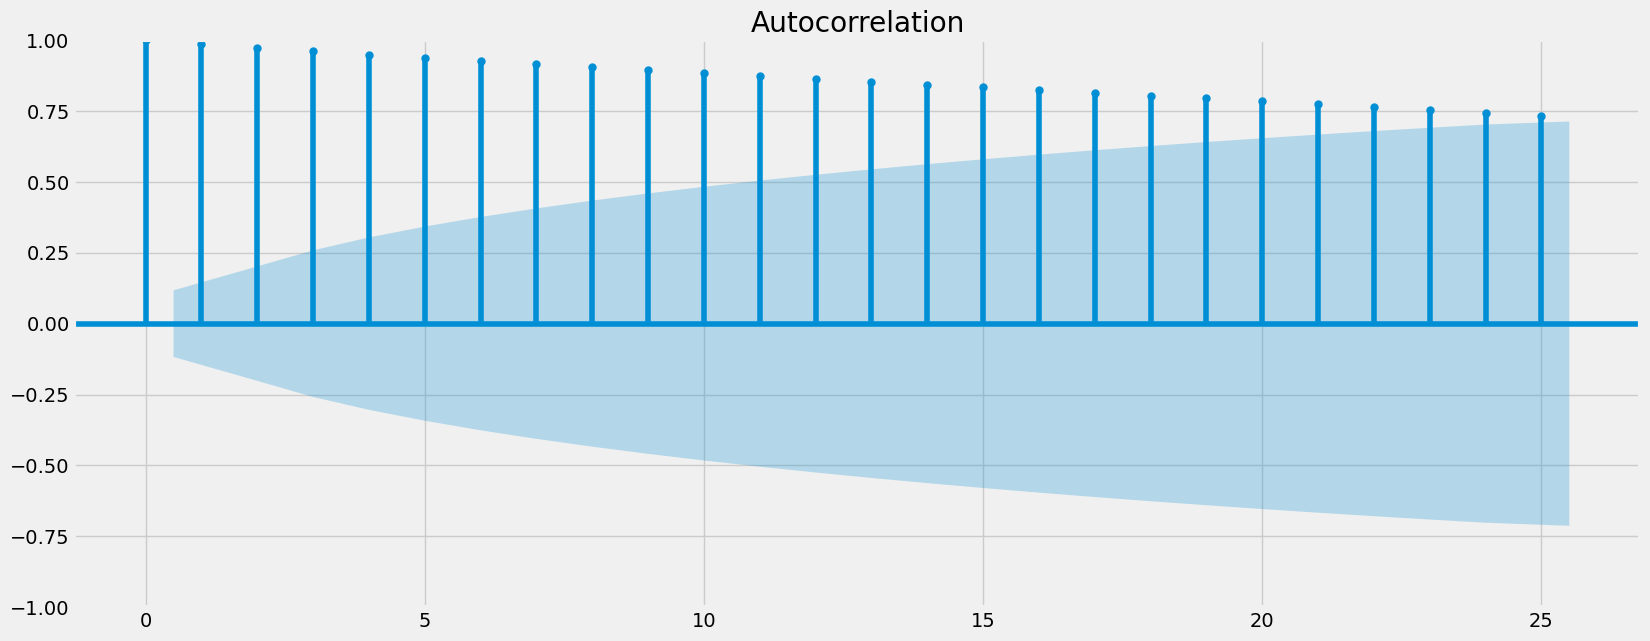

In [39]:
# Import autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation
plot_acf(df_smoothed)
plt.show()

#### Interpretation:

* The plot of autocorrelations shows all lines going above the blue edge of the confidence interval, meaning that the data contains lags that are significantly correlated with each other. 
* This further supports the result of the Dickey-Fuller test, namely that the dataset is likely non-stationary.

### 7. Stationarizing

#####  Round of Differencing

In [43]:
# Apply differencing formula
df_diff = df_smoothed - df_smoothed.shift(1)

In [44]:
# Remove missing values resulting from differencing
df_diff.dropna(inplace = True)

In [45]:
# Check for missing values
df_diff.isnull().sum()

Anomaly Moving Average    0
dtype: int64

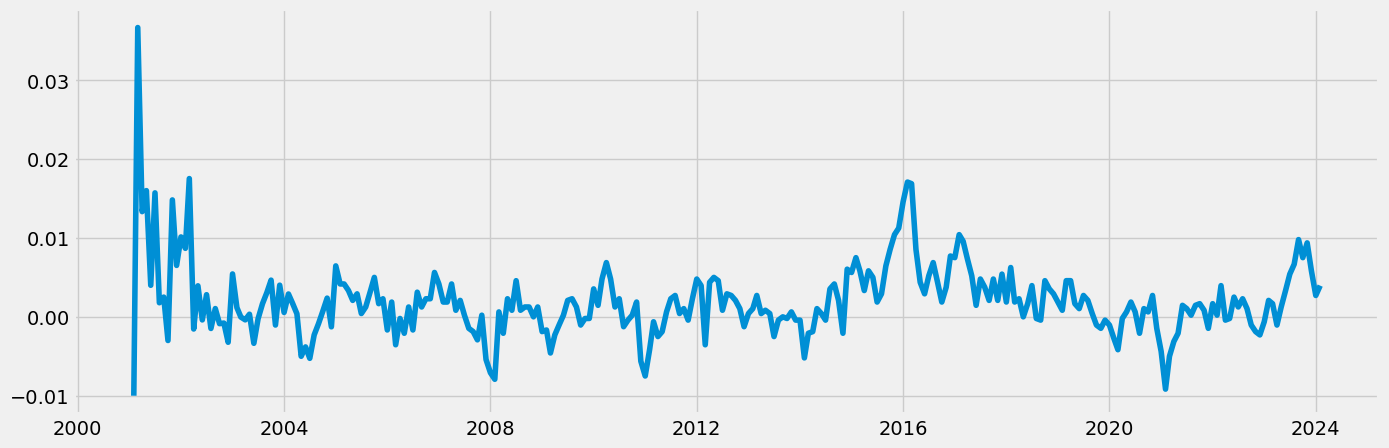

In [46]:
# Check the effect of differencing
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

### Dickey-Fuller test

In [48]:
# Suppress scientific notation by specifying the display format for floating-point numbers
pd.options.display.float_format = '{:,.20f}'.format

# Run Dickey-Fuller test
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.84655573240715220606
p-value                         0.00000036720322335382
Number of Lags Used             4.00000000000000000000
Number of Observations Used   272.00000000000000000000
Critical Value (1%)            -3.45462237825865337015
Critical Value (5%)            -2.87222532123002771698
Critical Value (10%)           -2.57246385002162636368
dtype: float64


#### Interpretation:

* After differencing, the test statistic of -5.84656 is now significantly lower than all critical values and the p-value is very close to zero (0.00000036720322335410), well below any common significance level.
* Therefore, the *null hypothesis ("there is a root unit in the data") can be rejected*, indicating that differencing has helped to make the data stationary.

### 9. Autocorrelation

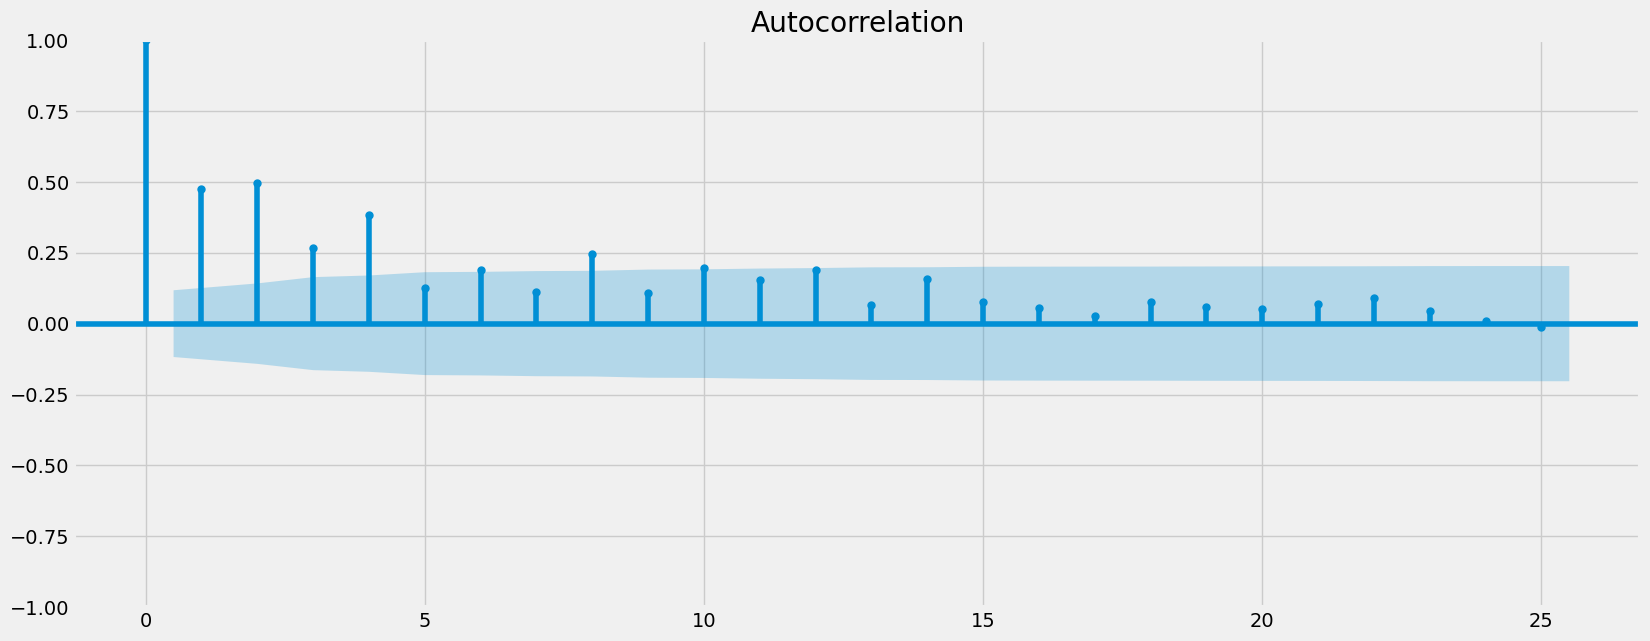

In [51]:
# Plot autocorrelation
plot_acf(df_diff)
plt.show()

#### Interpretation:

Although the autocorrelation plot has improved, there are still a few lags that exceed the confidence interval, indicating that the stationarity of the data is weak. However, since less than 10 lags are affected, the data is not further differenced.

### 10. Exporting data

In [54]:
# Confirm the shape of the dataset
df_smoothed.shape

(278, 1)

In [55]:
# Export df_smoothed as "temp_anomalies_smoothed.csv"
df_smoothed.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'temp_anomalies_smoothed.csv'))

In [56]:
# Confirm the shape of the dataset
df_diff.shape

(277, 1)

In [57]:
# Export df_diff as "temp_anomalies_stationarized.csv"
df_diff.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'temp_anomalies_stationarized.csv'))

### Part Bonus ARIMA


### Autocorrelation

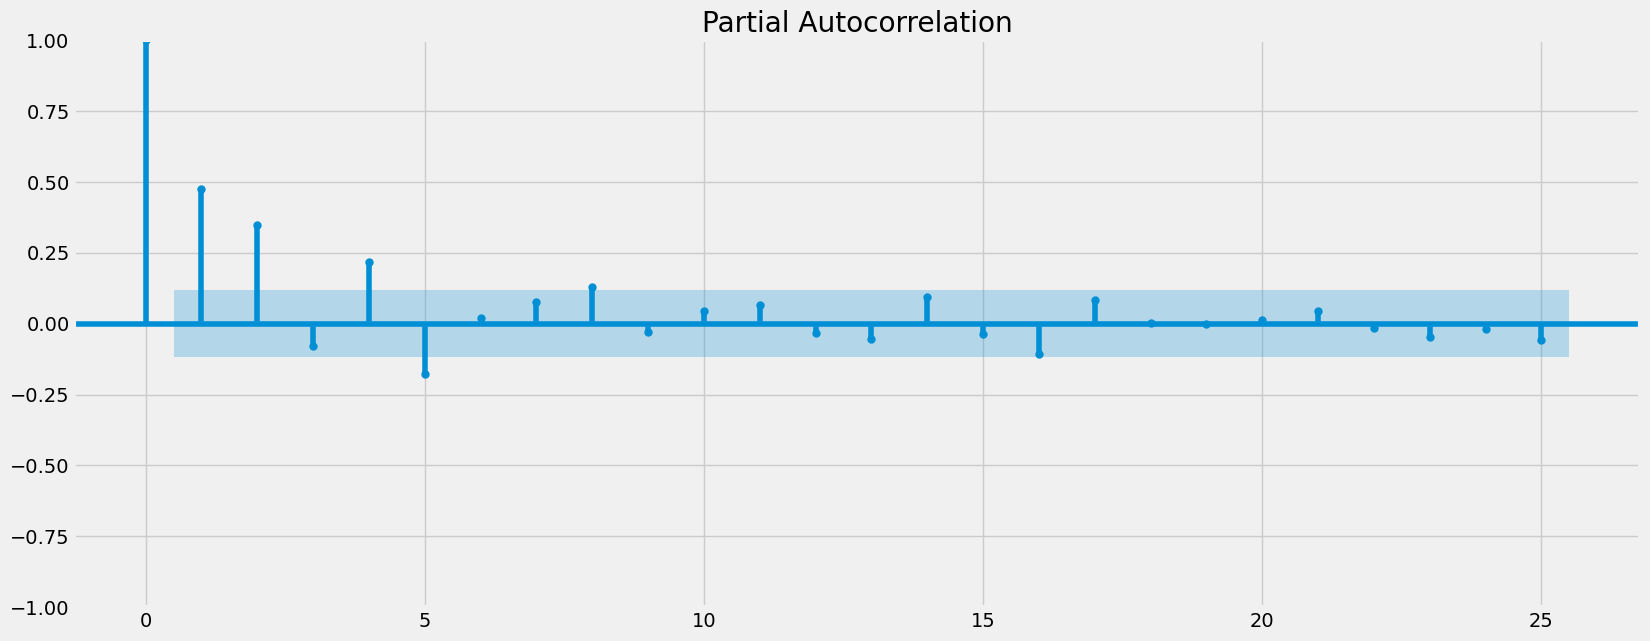

<Figure size 4500x4500 with 0 Axes>

In [132]:
# Plot partial autocorrelations to determine parameter p
plot_pacf(df_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

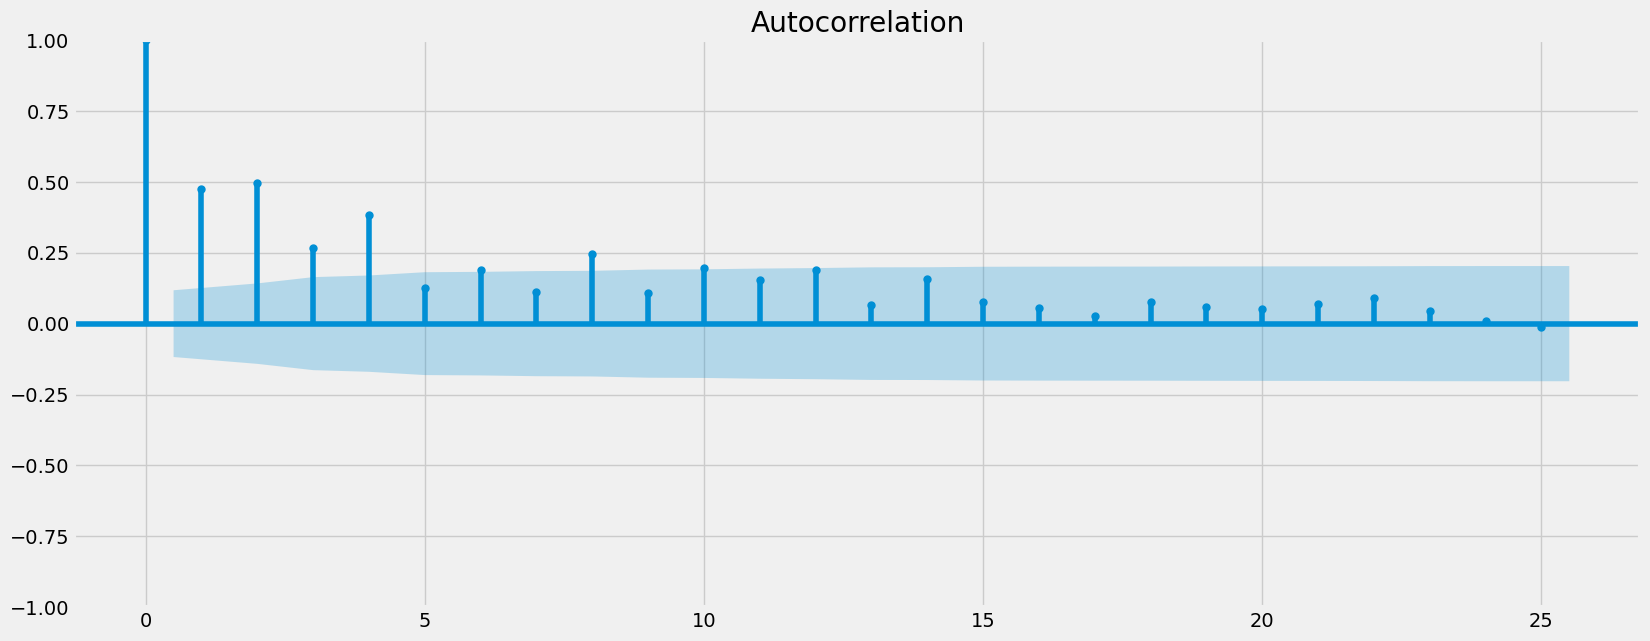

<Figure size 1500x500 with 0 Axes>

In [134]:
# Plot autocorrelations to determine parameter q
plot_acf(df_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

In [136]:
# Cornfirm the shape of the dataset
test_set.shape

(80, 1)

### Split the dataset

In [139]:
# Calculate the number of rows for training and testing
train_rows = int(len(df_diff) * 0.8)
test_rows = len(df_diff) - train_rows

# Split the dataset
train_set = df_diff.iloc[:train_rows]
test_set = df_diff.iloc[train_rows:]

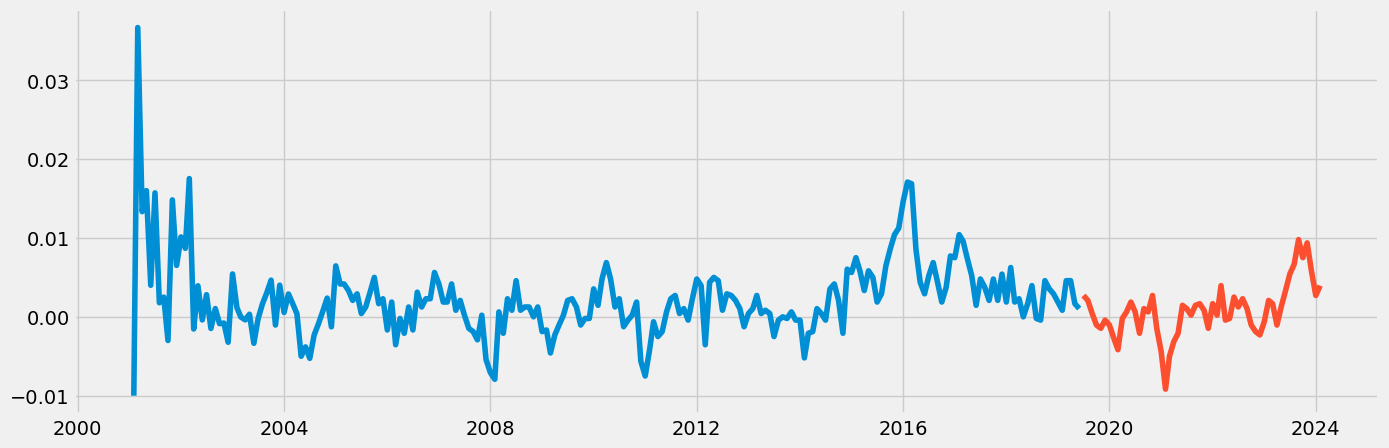

In [141]:
# Plot both sets in order to see the split
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_set)
plt.plot(test_set)

### Fit the model 

                                 SARIMAX Results                                  
Dep. Variable:     Anomaly Moving Average   No. Observations:                  221
Model:                     ARIMA(1, 1, 2)   Log Likelihood                 856.114
Date:                    Sat, 15 Mar 2025   AIC                          -1704.228
Time:                            13:13:46   BIC                          -1690.653
Sample:                        02-01-2001   HQIC                         -1698.746
                             - 06-01-2019                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8984      0.069    -12.998      0.000      -1.034      -0.763
ma.L1          0.6210      0.094      6.585      0.000       0.436       0.806
ma.L2         -0.299

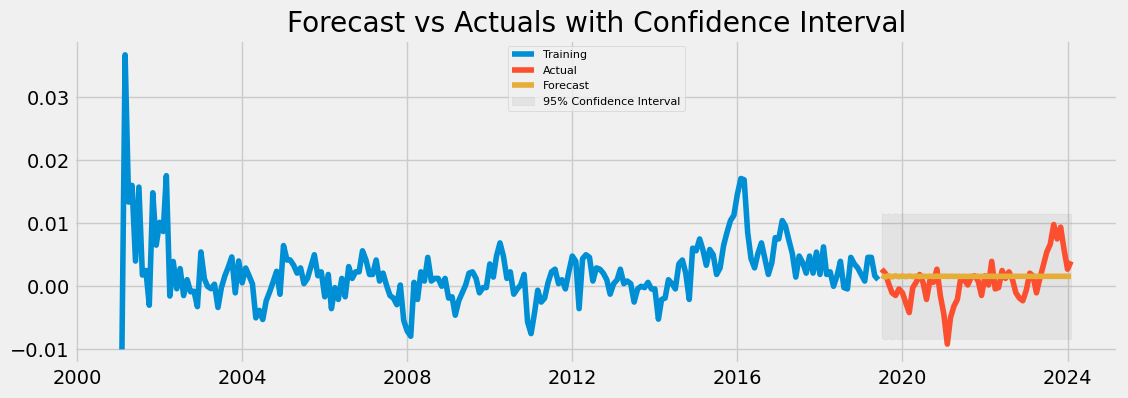

In [144]:
from statsmodels.tsa.api import ARIMA # Import the model you need
from scipy.stats import norm

model = ARIMA(train_set['Anomaly Moving Average'], order=(1, 1, 2))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_values = fitted.forecast(steps=len(test_set))

# Calculate standard deviation of residuals
residuals = fitted.resid
std_dev = np.std(residuals)

# Calculate confidence interval
alpha = 0.05  # 95% confidence interval
z_score = norm.ppf(1 - alpha / 2)  # Z-score for two-tailed test
margin_of_error = z_score * std_dev
lower_bound = forecast_values - margin_of_error
upper_bound = forecast_values + margin_of_error

# Convert forecast values and confidence interval to pandas Series
fc_series = pd.Series(forecast_values, index=test_set.index)
lower_series = pd.Series(lower_bound, index=test_set.index)
upper_series = pd.Series(upper_bound, index=test_set.index)

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train_set['Anomaly Moving Average'], label='Training')
plt.plot(test_set.index, test_set['Anomaly Moving Average'], label='Actual')
plt.plot(test_set.index, fc_series, label='Forecast')
plt.fill_between(test_set.index, lower_series, upper_series, color='k', alpha=0.05, label='95% Confidence Interval')
plt.title('Forecast vs Actuals with Confidence Interval')
plt.legend(loc='upper center', fontsize=8)
plt.show()